In [8]:
prompts_golden_retriever = [
    "Un Golden Retriever jugando con una pelota en un parque soleado",
    "Un Golden Retriever nadando en un lago durante el atardecer",
    "Un Golden Retriever sentado junto a una chimenea en una cabaña acogedora",
    "Un Golden Retriever corriendo por una playa con olas grandes",
]


In [9]:
len(prompts_golden_retriever)

4

In [10]:
import random
prompts=prompts_golden_retriever
random.shuffle(prompts)

In [11]:
print(prompts[:4])

['Un Golden Retriever sentado junto a una chimenea en una cabaña acogedora', 'Un Golden Retriever jugando con una pelota en un parque soleado', 'Un Golden Retriever nadando en un lago durante el atardecer', 'Un Golden Retriever corriendo por una playa con olas grandes']


In [5]:
%%capture
!pip install diffusers

In [6]:
from diffusers import DiffusionPipeline
pipeline = DiffusionPipeline.from_pretrained("SG161222/Realistic_Vision_V5.0_noVAE") # Loading the model

pipeline = pipeline.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
generated_images = pipeline(prompts).images

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 2.01 GiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return F.conv2d(input, weight, bias, self.stride,


In [14]:
import os

output_directory = "generated_images"

for i, image in enumerate(generated_images):
    image.save(os.path.join(output_directory, f'image_{i + 1}.png'))

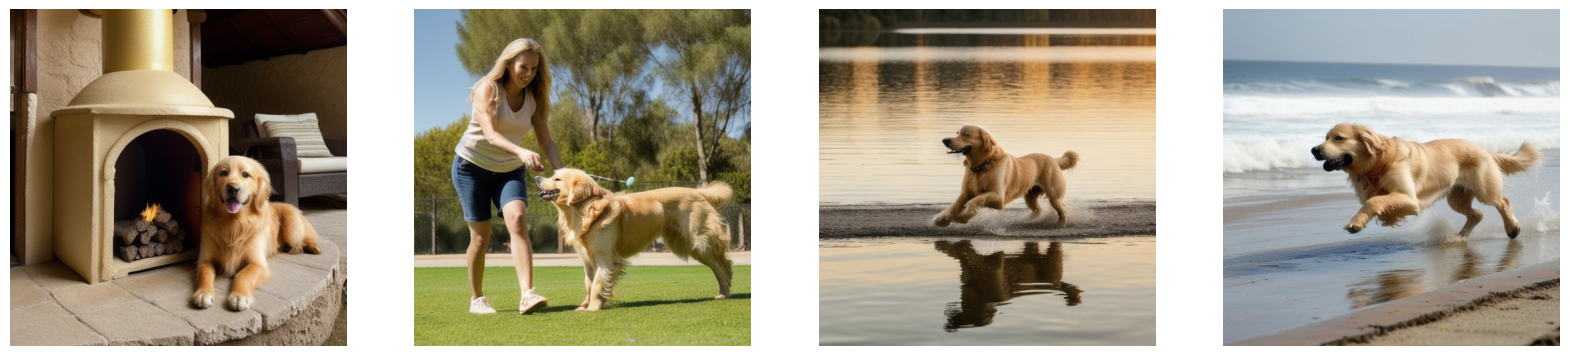

In [15]:
import matplotlib.pyplot as plt


rows = 1
columns = len(generated_images)


fig, axes = plt.subplots(rows, columns, figsize=(columns * 5, rows * 5))


axes = axes.flatten()


for i, image in enumerate(generated_images):
    axes[i].imshow(image)
    axes[i].axis('off')


plt.show()

    "Un Golden Retriever jugando con una pelota en un parque soleado",
    "Un Golden Retriever nadando en un lago durante el atardecer",
    "Un Golden Retriever sentado junto a una chimenea en una cabaña acogedora",
    "Un Golden Retriever corriendo por una playa con olas grandes",

In [16]:
%%capture
!pip install -q \
autodistill \
autodistill-grounded-sam \
autodistill-yolov8 \
roboflow \
supervision==0.9.0

In [17]:

from autodistill.detection import CaptionOntology

ontology=CaptionOntology({
    "animal face": "animal face",
})

In [18]:
import shutil

shutil.rmtree('output_folder', ignore_errors=True)

In [19]:
from autodistill_grounded_sam import GroundedSAM

base_model = GroundedSAM(ontology=ontology)
dataset = base_model.label(
    input_folder='generated_images',
    extension=".png",
    output_folder='output_folder')

trying to load grounding dino directly
downloading dino model weights


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)


final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Labeling generated_images/image_3.png:   0%|          | 0/4 [00:00<?, ?it/s]The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
Labeling generated_images/image_2.png: 100%|██████████| 4/4 [00:11<00:00,  2.95s/it]

Labeled dataset created - ready for distillation.


In [20]:
ANNOTATIONS_DIRECTORY_PATH = f"output_folder/train/labels"
IMAGES_DIRECTORY_PATH = f"output_folder/train/images"
DATA_YAML_PATH = f"output_folder/data.yaml"

SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (10,10)

In [21]:
import supervision as sv

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH)

len(dataset)

3

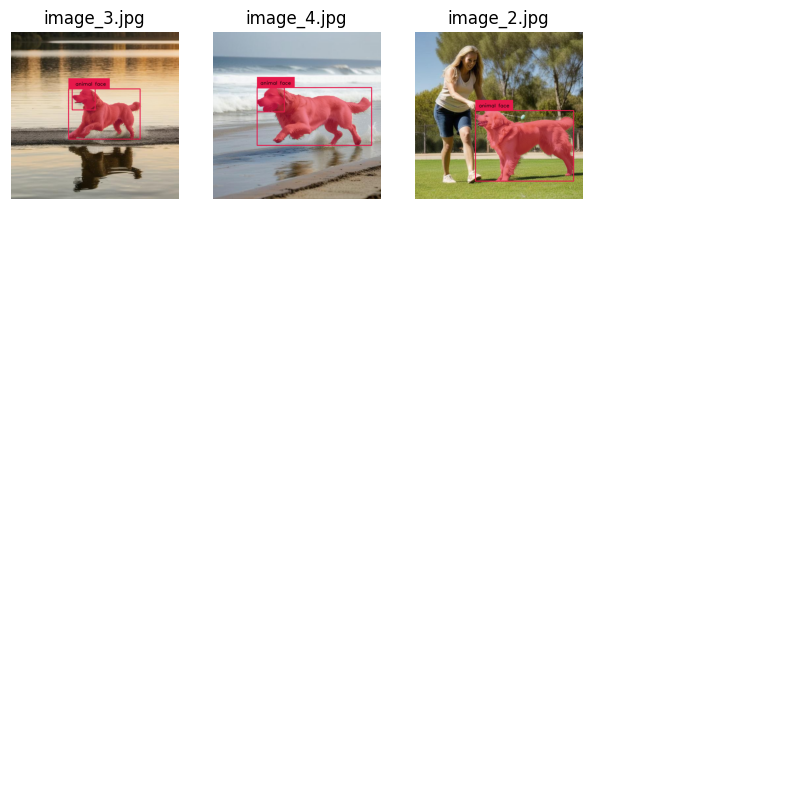

In [22]:
import supervision as sv

image_names = list(dataset.images.keys())[:5]

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()

images = []
for image_name in image_names:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]
    annotates_image = mask_annotator.annotate(
        scene=image.copy(),
        detections=annotations)
    annotates_image = box_annotator.annotate(
        scene=annotates_image,
        detections=annotations,
        labels=labels)
    images.append(annotates_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)